In [318]:
# Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Preparation
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Model Performance
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Model Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [225]:
df = pd.read_csv("train_small.csv")

In [226]:
df.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168020 entries, 0 to 2168019
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                float64
 15  price_usd                       float64
 16  has_promotion                   float64
 17  destination_id             

In [228]:
df.shape

(2168020, 54)

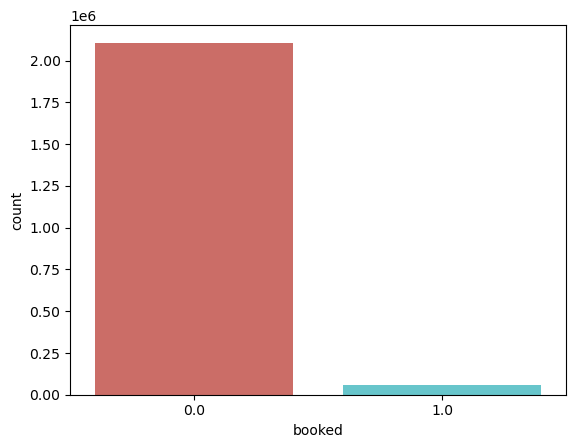

0.0    2107507
1.0      60512
Name: booked, dtype: int64

In [229]:
sns.countplot(x='booked',data=df, palette='hls')
plt.show();
df['booked'].value_counts()

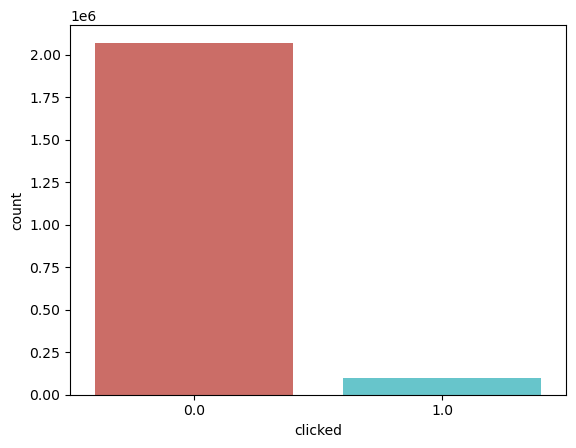

0.0    2071367
1.0      96652
Name: clicked, dtype: int64

In [230]:
sns.countplot(x='clicked',data=df, palette='hls')
plt.show();
df['clicked'].value_counts()

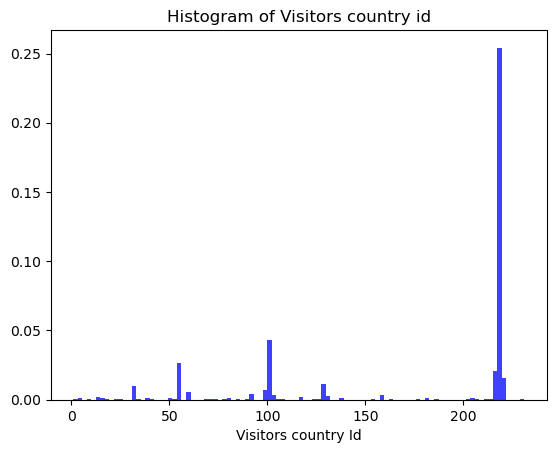

In [231]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(df.user_country_id, 100, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Visitors country Id')
plt.title('Histogram of Visitors country id')
plt.show();

In [232]:
df.groupby('user_country_id').size().nlargest(5)

user_country_id
219    1267264
100     214883
55      128014
216      94844
220      76939
dtype: int64

In [233]:
df = df.loc[df['user_country_id'] == 219]
df = df.sample(frac=0.6, random_state=99)
del df['user_country_id']

In [234]:
df.shape

(760358, 53)

#Null value Treatment

In [235]:
df.isnull().sum()

search_id                              0
timestamp                              0
site_id                                0
user_hist_stars                   729507
user_hist_paid                    729300
listing_country_id                     0
listing_id                             0
listing_stars                          0
listing_review_score                 718
is_brand                               0
location_score1                        0
location_score2                   177630
log_historical_price                   1
listing_position                       1
price_usd                              1
has_promotion                          1
destination_id                         1
length_of_stay                         1
booking_window                         1
num_adults                             1
num_kids                               1
num_rooms                              1
stay_on_saturday                       1
log_click_proportion              696454
distance_to_dest

In [236]:
cols_to_drop = ['user_hist_stars', 'user_hist_paid', 'log_click_proportion','competitor1_rate', 'competitor1_has_availability',
               'competitor1_price_percent_diff', 'competitor2_rate', 'competitor2_has_availability', 'competitor2_price_percent_diff',
               'competitor3_rate', 'competitor3_has_availability', 'competitor3_price_percent_diff','competitor4_rate', 'competitor4_has_availability', 'competitor4_price_percent_diff',
               'competitor5_rate', 'competitor5_has_availability', 'competitor5_price_percent_diff',
               'competitor6_rate', 'competitor6_has_availability', 'competitor6_price_percent_diff',
               'competitor7_rate', 'competitor7_has_availability', 'competitor7_price_percent_diff',
               'competitor8_rate', 'competitor8_has_availability', 'competitor8_price_percent_diff', 'booking_value']
df.drop(cols_to_drop, axis=1, inplace=True)

In [237]:
df.isnull().sum()

search_id                    0
timestamp                    0
site_id                      0
listing_country_id           0
listing_id                   0
listing_stars                0
listing_review_score       718
is_brand                     0
location_score1              0
location_score2         177630
log_historical_price         1
listing_position             1
price_usd                    1
has_promotion                1
destination_id               1
length_of_stay               1
booking_window               1
num_adults                   1
num_kids                     1
num_rooms                    1
stay_on_saturday             1
distance_to_dest         95069
random_sort                  1
clicked                      1
booked                       1
dtype: int64

In [238]:
df.shape

(760358, 25)

In [239]:
df['location_score2'].fillna((df['location_score2'].median()), inplace=True)

In [240]:
df['listing_review_score'].fillna((df['listing_review_score'].median()), inplace=True)

In [241]:
df['distance_to_dest'].fillna((df['distance_to_dest'].median()), inplace=True)

In [242]:
df[df.isna().any(axis=1)]

,search_id,timestamp,site_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,...,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,clicked,booked
2168019,606756,2013-04-08 06:21:06,5,98,73888,5,4.5,1,3.95,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,342.02,NaN,NaN,NaN


In [243]:
df.drop(df[df['search_id'] == 606756].index , inplace=True)

In [244]:
df.isnull().sum()

search_id               0
timestamp               0
site_id                 0
listing_country_id      0
listing_id              0
listing_stars           0
listing_review_score    0
is_brand                0
location_score1         0
location_score2         0
log_historical_price    0
listing_position        0
price_usd               0
has_promotion           0
destination_id          0
length_of_stay          0
booking_window          0
num_adults              0
num_kids                0
num_rooms               0
stay_on_saturday        0
distance_to_dest        0
random_sort             0
clicked                 0
booked                  0
dtype: int64

#EDA

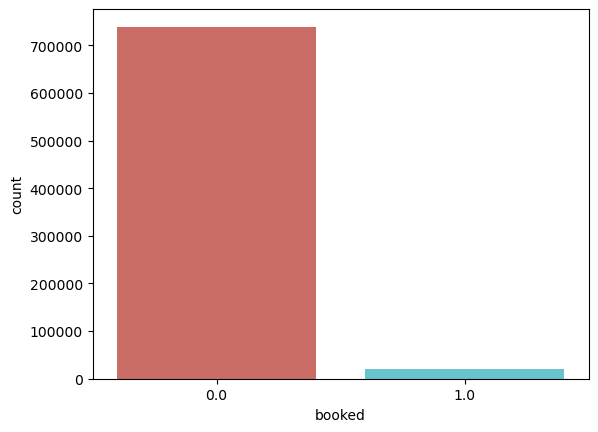

0.0    738960
1.0     21386
Name: booked, dtype: int64

In [246]:
sns.countplot(x='booked',data=df, palette='hls')
plt.show();
df['booked'].value_counts()

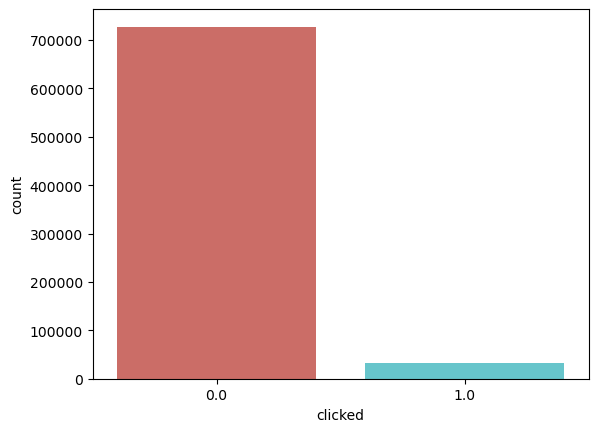

0.0    727520
1.0     32826
Name: clicked, dtype: int64

In [247]:
sns.countplot(x='clicked',data=df, palette='hls')
plt.show();
df['clicked'].value_counts()

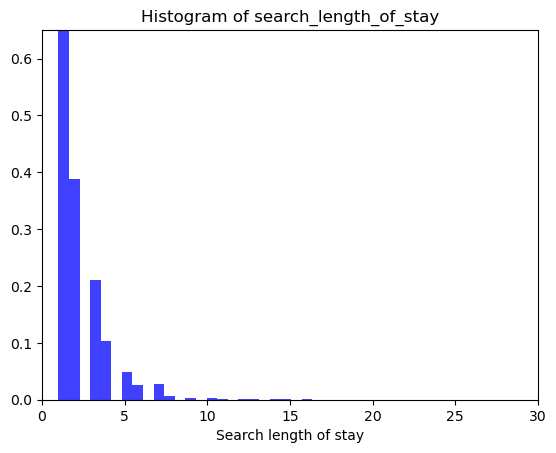

In [248]:
n, bins, patches = plt.hist(df.length_of_stay, 50, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Search length of stay')
plt.title('Histogram of search_length_of_stay')
plt.axis([0, 30, 0, 0.65])
plt.show();

In [249]:
df['length_of_stay'].value_counts()

1.0     359243
2.0     189026
3.0     102497
4.0      50478
5.0      23315
7.0      13177
6.0      12487
8.0       3438
9.0       1724
10.0      1306
14.0       862
11.0       677
12.0       477
13.0       362
15.0       217
16.0       210
28.0       147
17.0       130
22.0       102
19.0        92
20.0        73
26.0        72
18.0        41
21.0        35
27.0        33
24.0        33
23.0        21
30.0        21
33.0        20
29.0        17
25.0        13
Name: length_of_stay, dtype: int64

In [250]:
df.groupby('length_of_stay').size().nlargest(5)

length_of_stay
1.0    359243
2.0    189026
3.0    102497
4.0     50478
5.0     23315
dtype: int64

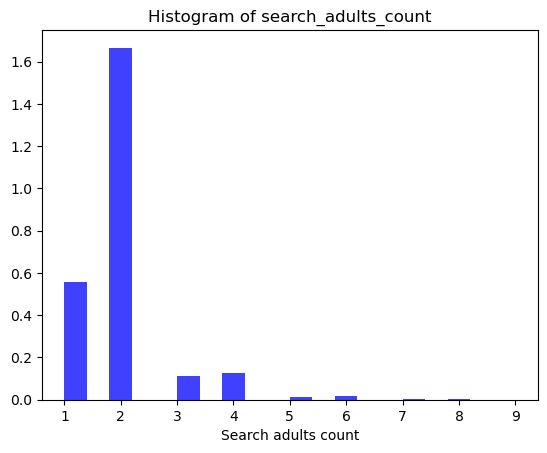

In [251]:
n, bins, patches = plt.hist(df.num_adults, 20, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Search adults count')
plt.title('Histogram of search_adults_count')
plt.show();

In [252]:
df.groupby('num_adults').size().nlargest(5)

num_adults
2.0    506560
1.0    169669
4.0     38681
3.0     34057
6.0      4840
dtype: int64

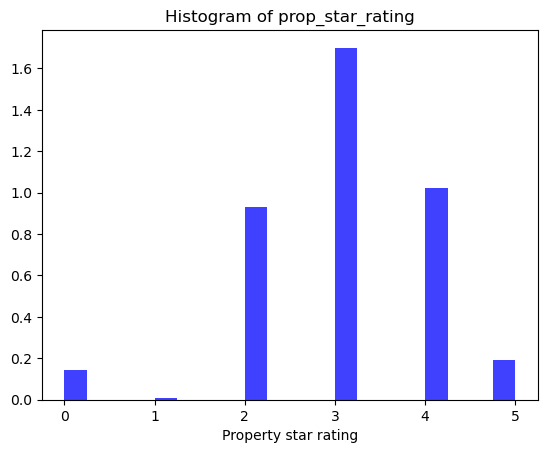

In [254]:
n, bins, patches = plt.hist(df.listing_stars, 20, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Property star rating')
plt.title('Histogram of prop_star_rating')
plt.show();

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760346 entries, 1285901 to 1146717
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   search_id             760346 non-null  int64  
 1   timestamp             760346 non-null  object 
 2   site_id               760346 non-null  int64  
 3   listing_country_id    760346 non-null  int64  
 4   listing_id            760346 non-null  int64  
 5   listing_stars         760346 non-null  int64  
 6   listing_review_score  760346 non-null  float64
 7   is_brand              760346 non-null  int64  
 8   location_score1       760346 non-null  float64
 9   location_score2       760346 non-null  float64
 10  log_historical_price  760346 non-null  float64
 11  listing_position      760346 non-null  float64
 12  price_usd             760346 non-null  float64
 13  has_promotion         760346 non-null  float64
 14  destination_id        760346 non-null  float6

In [258]:
cols_to_drop = ['search_id', 'timestamp', 'listing_id' ]
df.drop(cols_to_drop, axis=1, inplace=True)

In [259]:
df.shape

(760346, 22)

In [260]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
site_id,760346.0,5.407804,2.926463,1.00,5.0000,5.000,5.000,34.00
listing_country_id,760346.0,202.643512,47.535467,1.00,219.0000,219.000,219.000,230.00
listing_stars,760346.0,3.008287,1.007441,0.00,2.0000,3.000,4.000,5.00
listing_review_score,760346.0,3.853273,0.898962,0.00,3.5000,4.000,4.500,5.00
is_brand,760346.0,0.733886,0.441925,0.00,0.0000,1.000,1.000,1.00
location_score1,760346.0,2.618095,1.405532,0.00,1.6100,2.560,3.500,6.98
location_score2,760346.0,0.110787,0.136493,0.00,0.0289,0.066,0.127,1.00
log_historical_price,760346.0,4.269802,1.826132,0.00,4.3900,4.860,5.260,6.21
listing_position,760346.0,17.147163,10.570625,1.00,8.0000,16.000,26.000,40.00
price_usd,760346.0,163.955485,1918.946884,0.04,82.0000,118.000,177.000,722556.00


In [261]:
df.isnull().sum()

site_id                 0
listing_country_id      0
listing_stars           0
listing_review_score    0
is_brand                0
location_score1         0
location_score2         0
log_historical_price    0
listing_position        0
price_usd               0
has_promotion           0
destination_id          0
length_of_stay          0
booking_window          0
num_adults              0
num_kids                0
num_rooms               0
stay_on_saturday        0
distance_to_dest        0
random_sort             0
clicked                 0
booked                  0
dtype: int64

#Data Type Modification

In [262]:
df["booked"]=df["booked"].astype(object)

In [263]:
df["clicked"]=df["clicked"].astype(object)

In [264]:
df["site_id"]=df["site_id"].astype(object)

In [265]:
df["listing_country_id"]=df["listing_country_id"].astype(object)

In [266]:
df["listing_stars"]=df["listing_stars"].astype(object)

In [267]:
df["has_promotion"]=df["has_promotion"].astype(object)

In [268]:
df["is_brand"]=df["is_brand"].astype(object)

In [269]:
df["stay_on_saturday"]=df["stay_on_saturday"].astype(object)

In [270]:
df["destination_id"]=df["destination_id"].astype(object)

In [271]:
df["random_sort"]=df["random_sort"].astype(object)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760346 entries, 1285901 to 1146717
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   site_id               760346 non-null  object 
 1   listing_country_id    760346 non-null  object 
 2   listing_stars         760346 non-null  object 
 3   listing_review_score  760346 non-null  float64
 4   is_brand              760346 non-null  object 
 5   location_score1       760346 non-null  float64
 6   location_score2       760346 non-null  float64
 7   log_historical_price  760346 non-null  float64
 8   listing_position      760346 non-null  float64
 9   price_usd             760346 non-null  float64
 10  has_promotion         760346 non-null  object 
 11  destination_id        760346 non-null  object 
 12  length_of_stay        760346 non-null  float64
 13  booking_window        760346 non-null  float64
 14  num_adults            760346 non-null  float6

In [273]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_review_score,760346.0,3.853273,0.898962,0.00,3.5000,4.000,4.500,5.00
location_score1,760346.0,2.618095,1.405532,0.00,1.6100,2.560,3.500,6.98
location_score2,760346.0,0.110787,0.136493,0.00,0.0289,0.066,0.127,1.00
log_historical_price,760346.0,4.269802,1.826132,0.00,4.3900,4.860,5.260,6.21
listing_position,760346.0,17.147163,10.570625,1.00,8.0000,16.000,26.000,40.00
price_usd,760346.0,163.955485,1918.946884,0.04,82.0000,118.000,177.000,722556.00
length_of_stay,760346.0,2.160163,1.779752,1.00,1.0000,2.000,3.000,33.00
booking_window,760346.0,30.692720,45.449378,0.00,3.0000,13.000,38.000,488.00
num_adults,760346.0,1.983098,0.851972,1.00,2.0000,2.000,2.000,9.00
num_kids,760346.0,0.365912,0.765760,0.00,0.0000,0.000,0.000,9.00


In [274]:
df.describe(include=np.object).T

C:\Users\acer\AppData\Local\Temp\ipykernel_10752\1291894002.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object).T


,count,unique,top,freq
site_id,760346.0,29.0,5.0,742729.0
listing_country_id,760346.0,134.0,219.0,662055.0
listing_stars,760346.0,6.0,3.0,323153.0
is_brand,760346.0,2.0,1.0,558007.0
has_promotion,760346.0,2.0,0.0,615664.0
destination_id,760346.0,8292.0,8192.0,13757.0
stay_on_saturday,760346.0,2.0,1.0,409503.0
random_sort,760346.0,2.0,0.0,546059.0
clicked,760346.0,2.0,0.0,727520.0
booked,760346.0,2.0,0.0,738960.0


In [275]:
num = [cols for cols in df.columns if df[cols].dtype != 'object']
num

['listing_review_score',
 'location_score1',
 'location_score2',
 'log_historical_price',
 'listing_position',
 'price_usd',
 'length_of_stay',
 'booking_window',
 'num_adults',
 'num_kids',
 'num_rooms',
 'distance_to_dest']

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


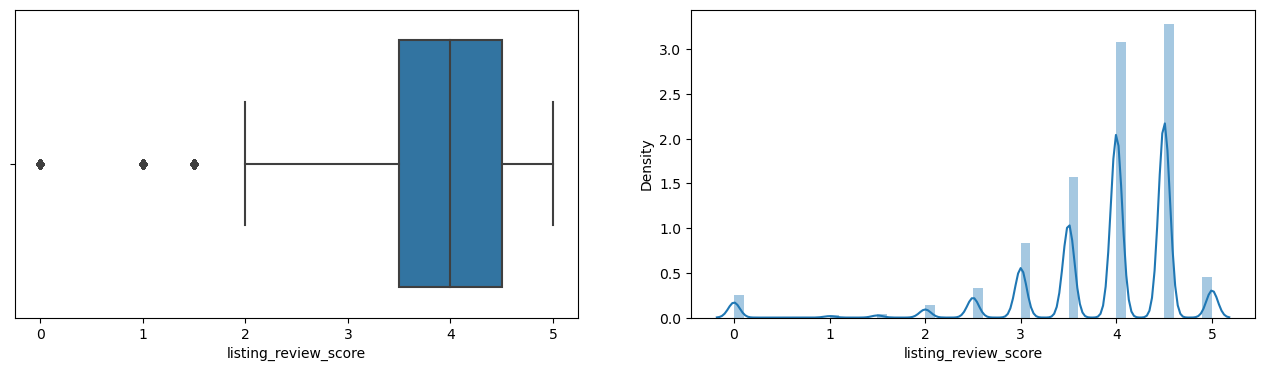

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


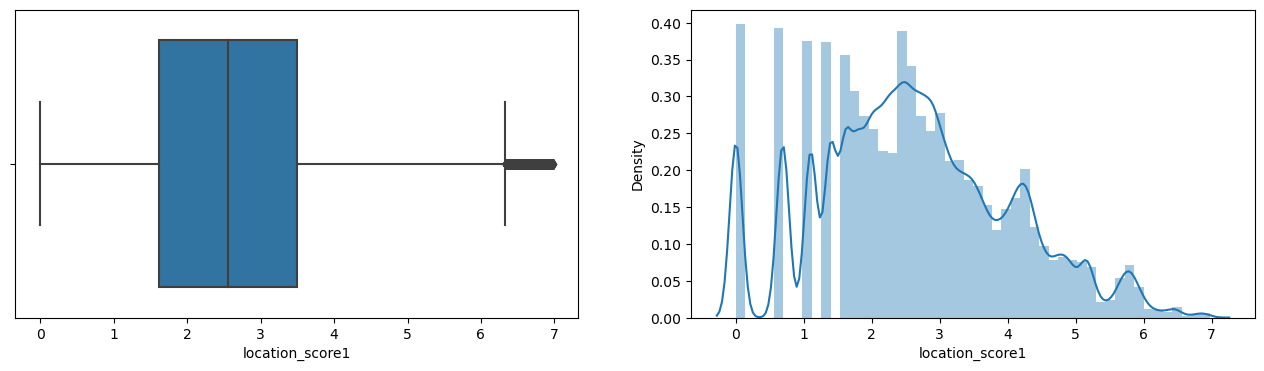

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


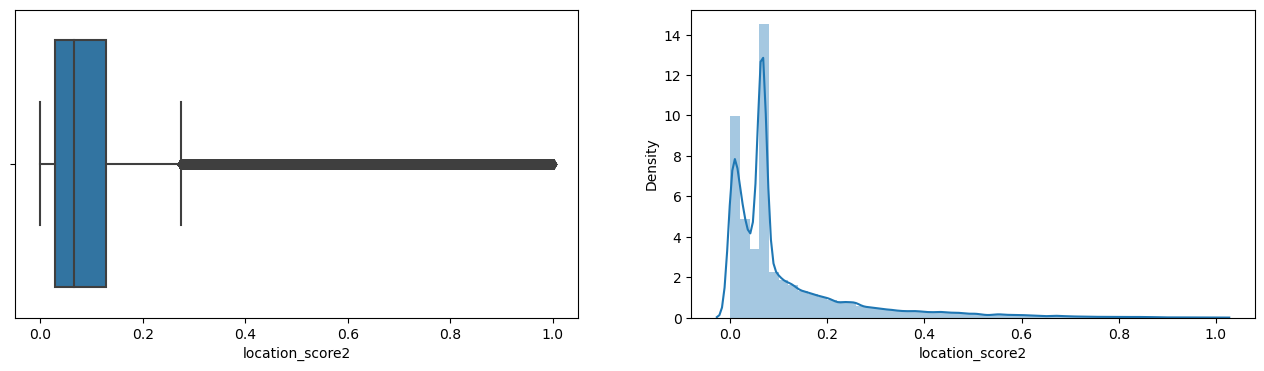

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


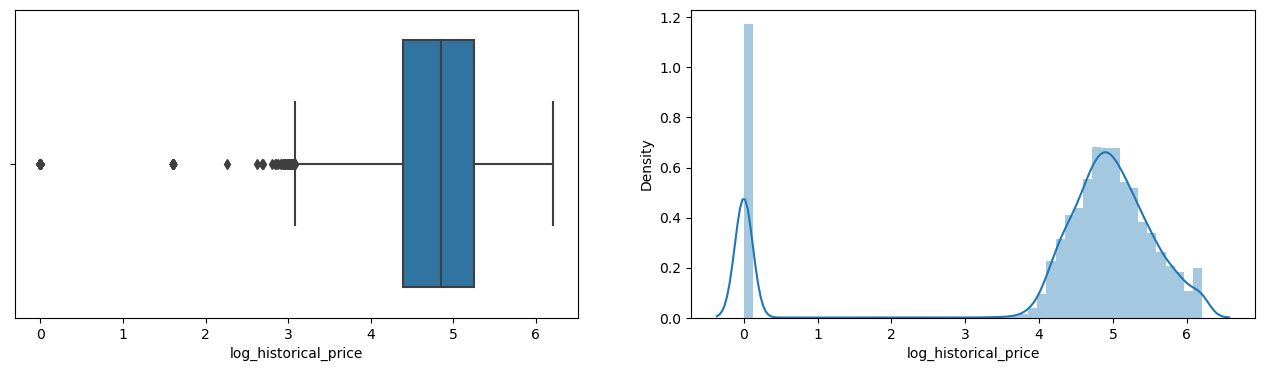

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


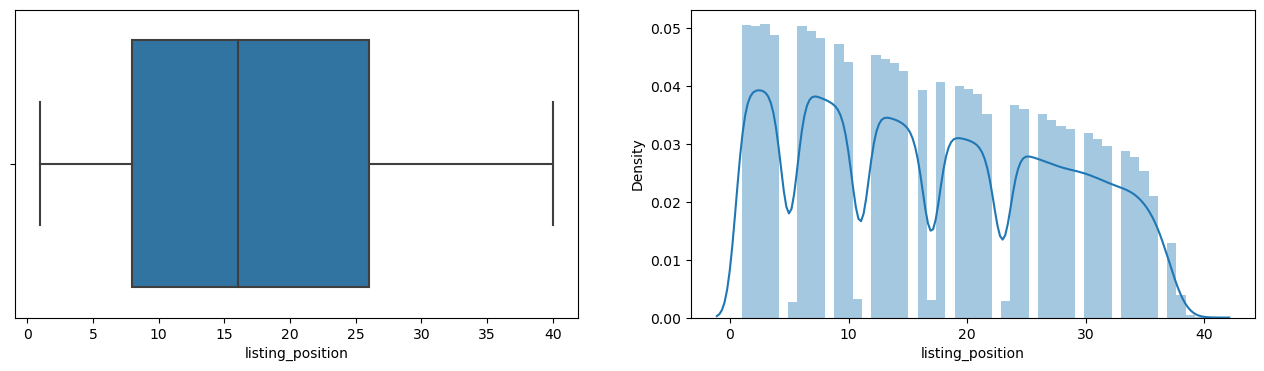

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


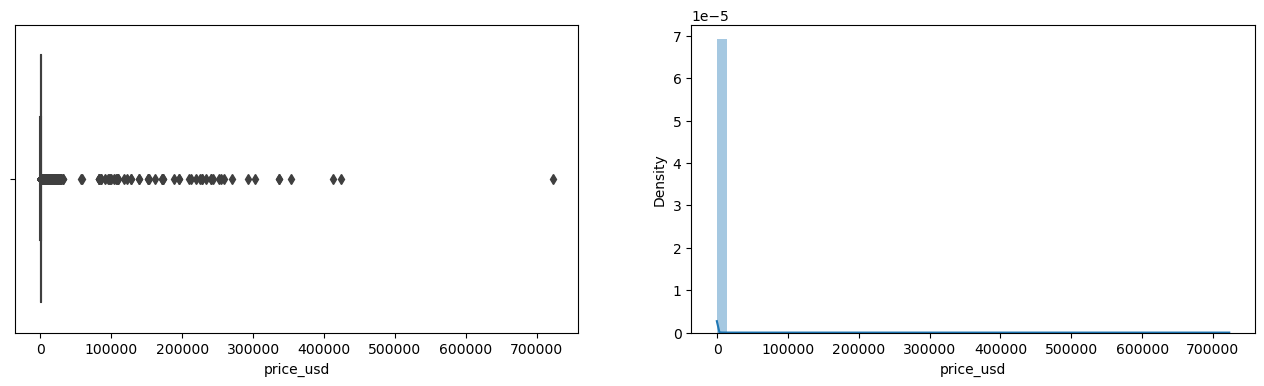

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


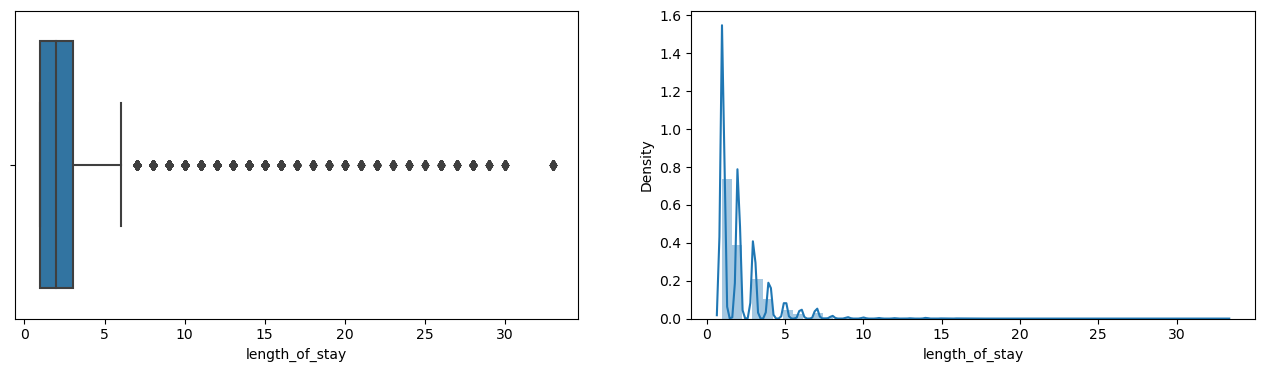

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


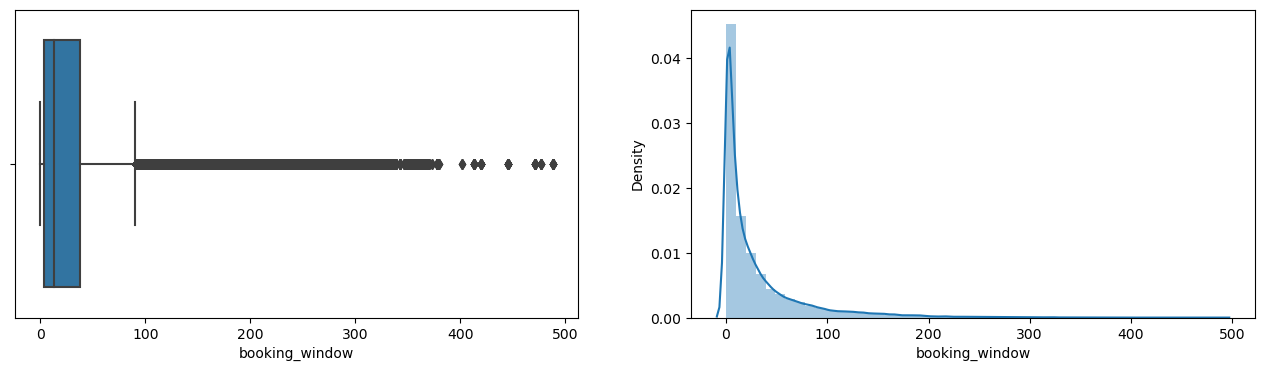

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


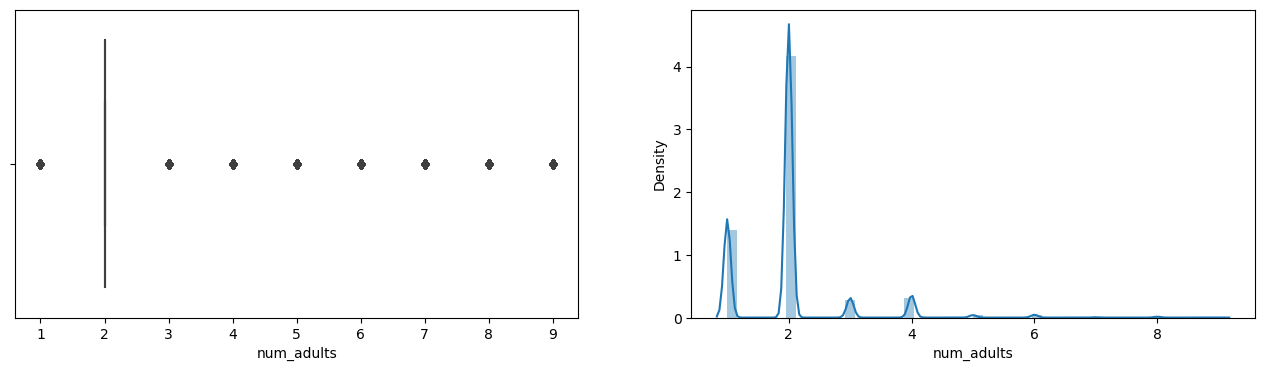

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


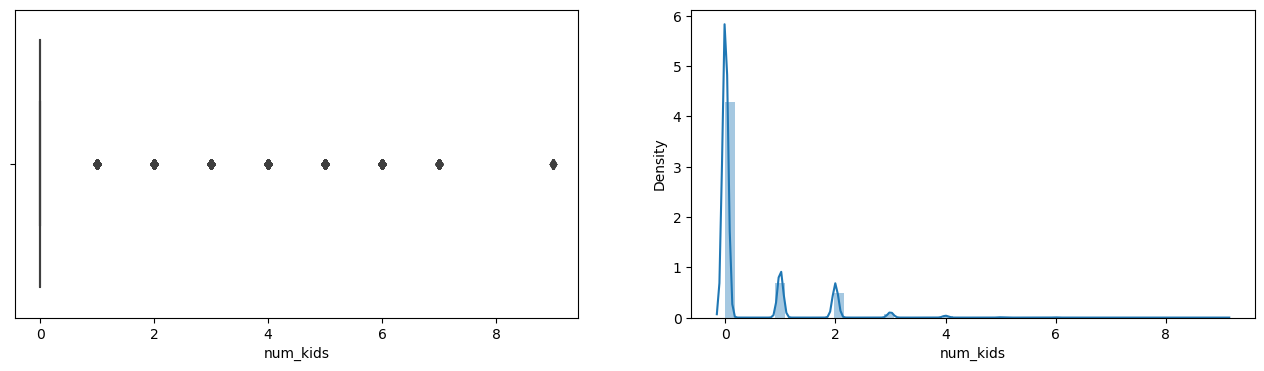

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


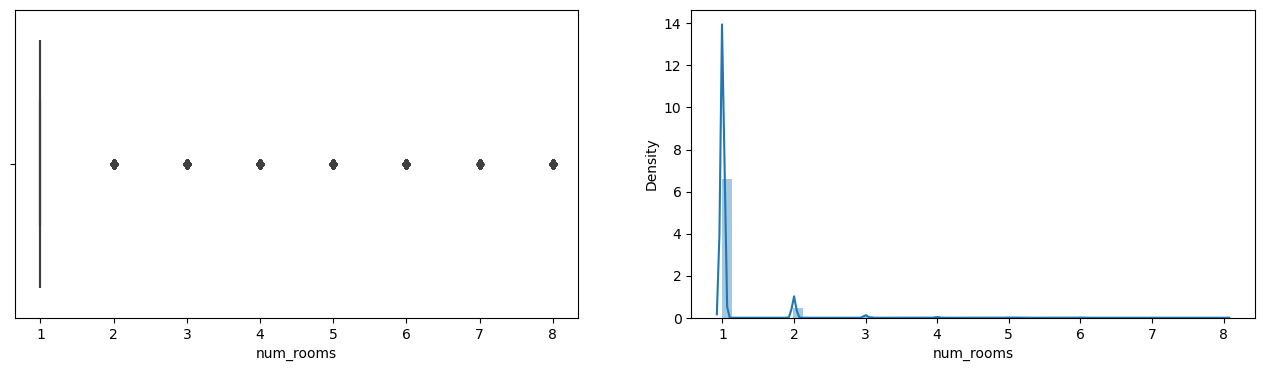

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


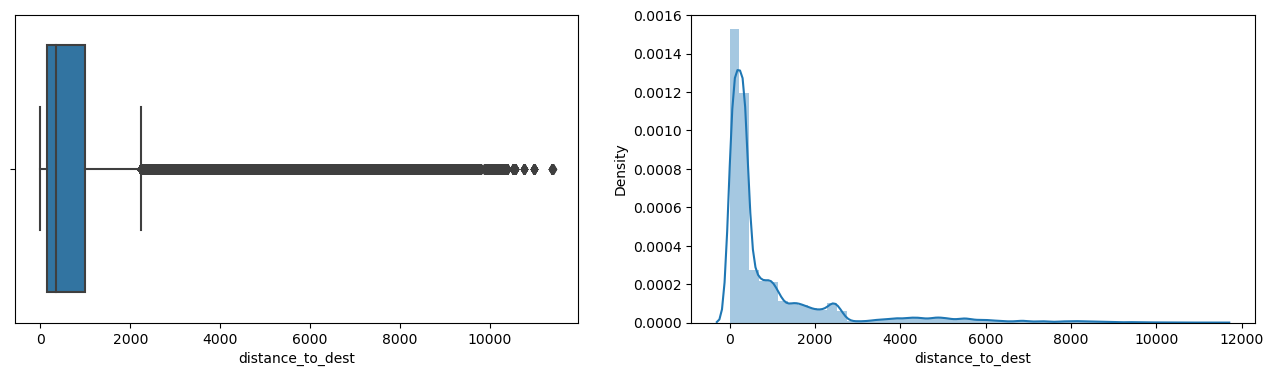

In [276]:
for cols in num:
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    sns.boxplot(df[cols])
    plt.subplot(1,2,2)
    sns.distplot(df[cols])
    plt.show()

#Multivariate Analysis (Heat Map)

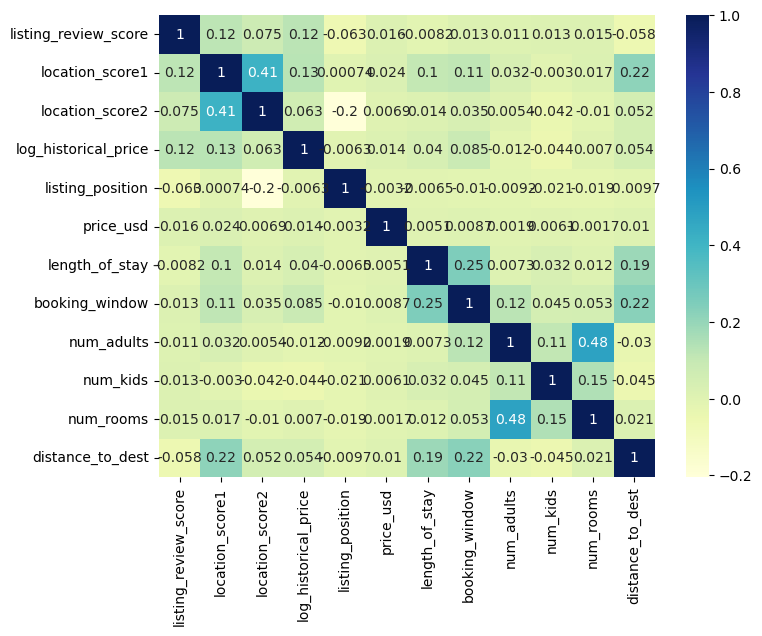

In [277]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

In [279]:
num = [cols for cols in df.columns if df[cols].dtype != 'object']
num

['listing_review_score',
 'location_score1',
 'location_score2',
 'log_historical_price',
 'listing_position',
 'price_usd',
 'length_of_stay',
 'booking_window',
 'num_adults',
 'num_kids',
 'num_rooms',
 'distance_to_dest']

In [280]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'Missing Values Count' : missing_count_df, 'Percentage' : missing_percentage_df }) # create a dataframe
missing_df

,Missing Values Count,Percentage
site_id,0,0.0
listing_country_id,0,0.0
listing_stars,0,0.0
listing_review_score,0,0.0
is_brand,0,0.0
location_score1,0,0.0
location_score2,0,0.0
log_historical_price,0,0.0
listing_position,0,0.0
price_usd,0,0.0


Duplicate Row Treatment

In [281]:
df.duplicated().sum()

163

In [282]:
df.drop_duplicates(inplace=True)

In [283]:
df.duplicated().sum()

0

Outlier Treatment

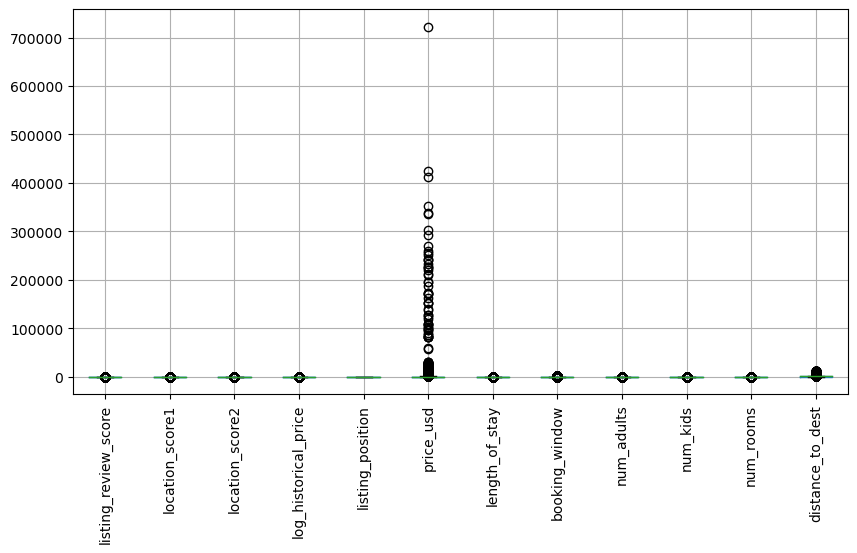

In [284]:
df.boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

In [285]:
def get_bounds(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return lower_bound, upper_bound

In [286]:
num = [cols for cols in df.columns if df[cols].dtype != 'object']
num

['listing_review_score',
 'location_score1',
 'location_score2',
 'log_historical_price',
 'listing_position',
 'price_usd',
 'length_of_stay',
 'booking_window',
 'num_adults',
 'num_kids',
 'num_rooms',
 'distance_to_dest']

In [287]:
for cols in num:
    lb, ub = get_bounds(df, cols)
    df[cols] = np.where(df[cols]>ub, ub, df[cols])
    df[cols] = np.where(df[cols]<lb, lb, df[cols])

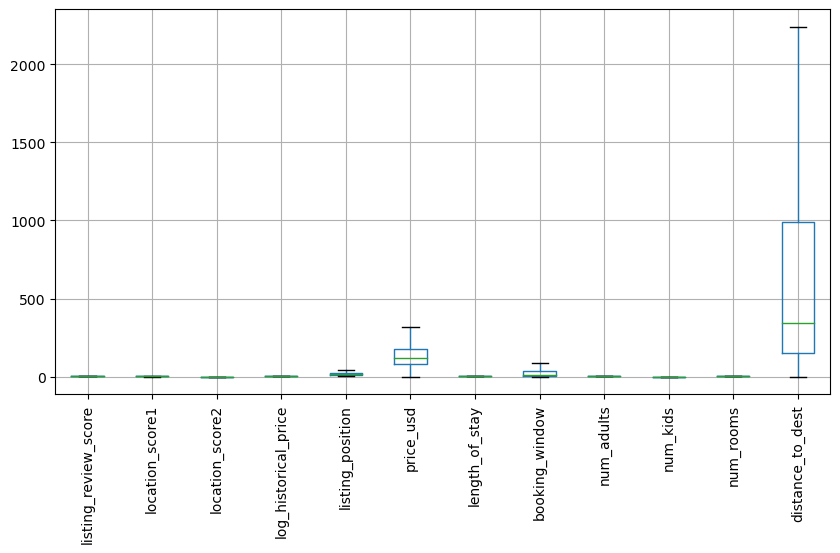

In [288]:
df.boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

In [289]:
df.head()

,site_id,listing_country_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,...,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,clicked,booked
1285901,5,219,3,4.5,1,1.10,0.06600,5.220,15.0,130.0,...,2.0,6.0,2.0,0.0,1.0,1.0,97.15,1.0,0.0,0.0
1883345,5,219,4,4.0,1,4.30,0.23730,3.085,19.0,165.0,...,2.0,0.0,2.0,0.0,1.0,0.0,397.77,1.0,0.0,0.0
1471852,5,219,2,4.0,1,1.39,0.01630,4.080,30.0,59.0,...,1.0,6.0,2.0,0.0,1.0,0.0,176.43,0.0,0.0,0.0
1700993,5,55,3,3.5,0,5.03,0.27415,3.085,7.0,222.0,...,2.0,1.0,2.0,0.0,1.0,0.0,2240.49,0.0,0.0,0.0
1876607,5,219,4,4.5,0,4.06,0.15680,5.600,34.0,224.0,...,1.0,1.0,2.0,0.0,1.0,0.0,1.56,1.0,0.0,0.0


In [291]:
df.isnull().sum()

site_id                 0
listing_country_id      0
listing_stars           0
listing_review_score    0
is_brand                0
location_score1         0
location_score2         0
log_historical_price    0
listing_position        0
price_usd               0
has_promotion           0
destination_id          0
length_of_stay          0
booking_window          0
num_adults              0
num_kids                0
num_rooms               0
stay_on_saturday        0
distance_to_dest        0
random_sort             0
clicked                 0
booked                  0
dtype: int64

Train-test-split

In [293]:
df = df.drop("booked", axis=1)
m = df

In [294]:
m.head()

,site_id,listing_country_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,...,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,clicked
1285901,3,125,3,4.5,1,1.10,0.06600,5.220,15.0,130.0,...,5153,2.0,6.0,2.0,0.0,1.0,1,97.15,1,0
1883345,3,125,4,4.0,1,4.30,0.23730,3.085,19.0,165.0,...,2387,2.0,0.0,2.0,0.0,1.0,0,397.77,1,0
1471852,3,125,2,4.0,1,1.39,0.01630,4.080,30.0,59.0,...,3072,1.0,6.0,2.0,0.0,1.0,0,176.43,0,0
1700993,3,32,3,3.5,0,5.03,0.27415,3.085,7.0,222.0,...,5958,2.0,1.0,2.0,0.0,1.0,0,2240.49,0,0
1876607,3,125,4,4.5,0,4.06,0.15680,5.600,34.0,224.0,...,1305,1.0,1.0,2.0,0.0,1.0,0,1.56,1,0


In [215]:
X = df.drop("clicked", axis=1)
y = df.pop("clicked")

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.3, random_state=1)

In [217]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (532128, 20)
X_test (228055, 20)
train_labels (532128,)
test_labels (228055,)


In [74]:
X_train.isnull().sum()

site_id                 0
listing_country_id      0
listing_stars           0
listing_review_score    0
is_brand                0
location_score1         0
location_score2         0
log_historical_price    0
listing_position        0
price_usd               0
has_promotion           0
destination_id          0
length_of_stay          0
booking_window          0
num_adults              0
num_kids                0
num_rooms               0
stay_on_saturday        0
distance_to_dest        0
random_sort             0
dtype: int64

In [75]:
train_labels.isnull().sum()

0

Balancing the data:

In [76]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [77]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=43)
X_train, train_labels =sm.fit_resample(X_train, train_labels)

In [78]:
#X_train['length_of_stay'].value_counts()

In [79]:
train_labels.value_counts()

0    509183
1    509183
Name: clicked, dtype: int64

Feature Selection

In [80]:
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns

In [81]:
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                 feature       VIF
0                site_id  1.008694
1     listing_country_id  1.411162
2          listing_stars  1.664292
3   listing_review_score  1.299147
4               is_brand  1.151179
5        location_score1  1.509781
6        location_score2  1.318047
7   log_historical_price  1.280904
8       listing_position  1.162659
9              price_usd  1.698662
10         has_promotion  1.085177
11        destination_id  1.003085
12        length_of_stay  1.278071
13        booking_window  1.244275
14            num_adults  0.000000
15              num_kids       NaN
16             num_rooms  0.000000
17      stay_on_saturday  1.109025
18      distance_to_dest  1.487414
19           random_sort  1.069015


Model 1: Logistic regression

In [82]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  1.2min finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [83]:
Ytrain_predict = model.predict(X_train)
Ytest_predict = model.predict(X_test)

In [84]:
Ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.719144,0.280856
1,0.792137,0.207863
2,0.968199,0.031801
3,0.329434,0.670566
4,0.253940,0.746060


In [85]:
# Accuracy - Training Data
log_train_acc = model.score(X_train, train_labels)
log_train_acc

0.7501605513145568

AUC: 0.826


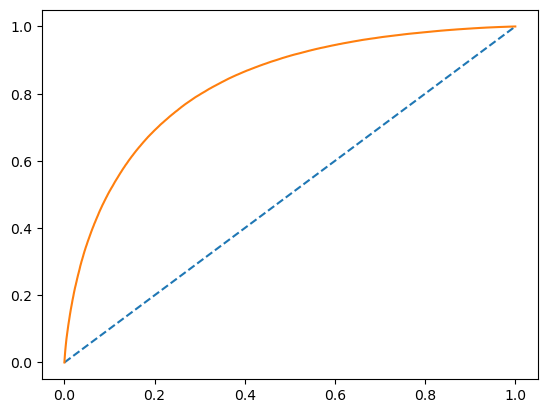

In [86]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [87]:
log_test_acc=model.score(X_test, test_labels)
log_test_acc

0.7195413387121528

AUC: 0.826


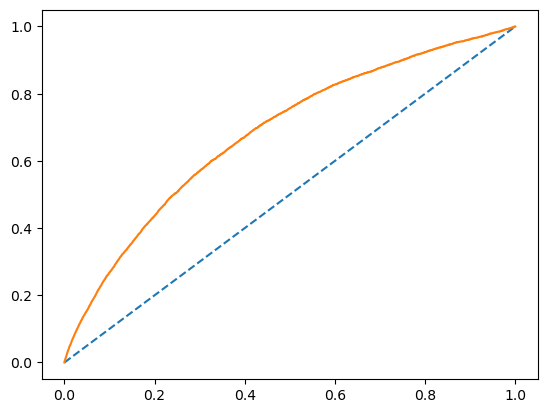

In [88]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [89]:
confusion_matrix(train_labels, Ytrain_predict)

array([[370540, 138643],
       [115785, 393398]], dtype=int64)

In [90]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


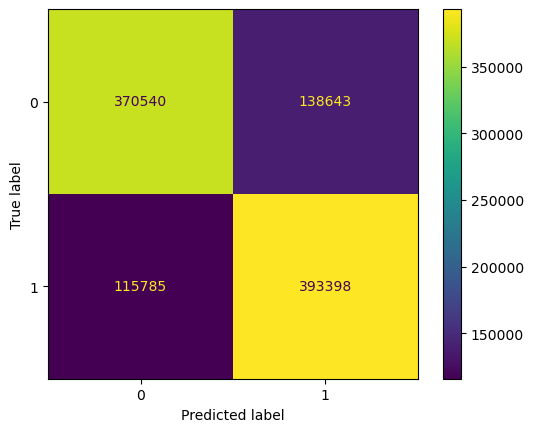

In [91]:
plot_confusion_matrix(model,X_train,train_labels);

In [92]:
print(classification_report(train_labels, Ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74    509183
           1       0.74      0.77      0.76    509183

    accuracy                           0.75   1018366
   macro avg       0.75      0.75      0.75   1018366
weighted avg       0.75      0.75      0.75   1018366



In [93]:
confusion_matrix(test_labels, Ytest_predict)

array([[158791,  59385],
       [  4575,   5304]], dtype=int64)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


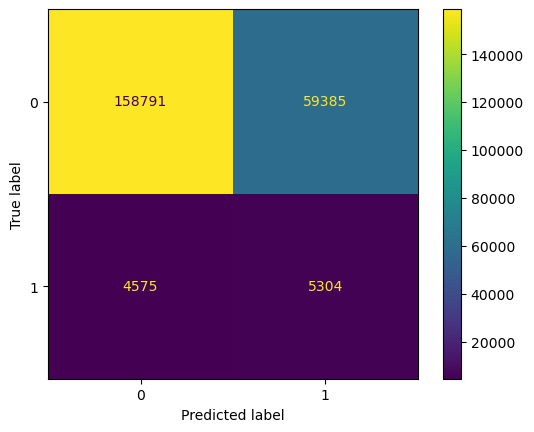

In [94]:
plot_confusion_matrix(model,X_test,test_labels);

In [95]:
print(classification_report(test_labels, Ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83    218176
           1       0.08      0.54      0.14      9879

    accuracy                           0.72    228055
   macro avg       0.53      0.63      0.49    228055
weighted avg       0.93      0.72      0.80    228055



In [96]:
logis_metrics=classification_report(train_labels, Ytrain_predict,output_dict=True)
df=pd.DataFrame(logis_metrics).transpose()
logis_train_precision=round(df.loc["1"][0],2)
logis_train_recall=round(df.loc["1"][1],2)
logis_train_f1=round(df.loc["1"][2],2)
print ('logis_train_precision ',logis_train_precision)
print ('logis_train_recall ',logis_train_recall)
print ('logis_train_f1 ',logis_train_f1)

logis_train_precision  0.74
logis_train_recall  0.77
logis_train_f1  0.76


In [97]:
logis_metrics=classification_report(test_labels, Ytest_predict,output_dict=True)
df=pd.DataFrame(logis_metrics).transpose()
logis_test_precision=round(df.loc["1"][0],2)
logis_test_recall=round(df.loc["1"][1],2)
logis_test_f1=round(df.loc["1"][2],2)
print ('logis_test_precision ',logis_test_precision)
print ('logis_test_recall ',logis_test_recall)
print ('logis_test_f1 ',logis_test_f1)


logis_test_precision  0.08
logis_test_recall  0.54
logis_test_f1  0.14


In [98]:
index=['Accuracy', 'AUC', 'Recall']
data = pd.DataFrame({
       'Log Train':[log_train_acc,auc,logis_train_recall],          
},index=index)
round(data,2)

,Log Train
Accuracy,0.75
AUC,0.83
Recall,0.77


In [99]:
index=['Accuracy', 'AUC', 'Recall']
data = pd.DataFrame({
       'Log Train':[log_test_acc,test_auc,logis_test_recall],          
},index=index)
round(data,2)

,Log Train
Accuracy,0.72
AUC,0.68
Recall,0.54


Model 2. Linear Discriminant Analysis

In [100]:
clf = LinearDiscriminantAnalysis(solver='eigen',shrinkage = 'auto',)
model=clf.fit(X_train,train_labels)
model

LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')

In [101]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)
#*************************************************************#
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
pred_class_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

In [102]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
#*************************************************************#
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [103]:
confusion_matrix(train_labels, pred_class_train)

array([[363165, 146018],
       [109263, 399920]], dtype=int64)

In [104]:
confusion_matrix(test_labels, pred_class_test)

array([[155574,  62602],
       [  4343,   5536]], dtype=int64)

In [105]:
lda_train_acc = model.score(X_train,train_labels)
lda_train_acc

0.7493229349762266

In [106]:
lda_test_acc = model.score(X_test,test_labels)
lda_test_acc

0.7064523908706233

In [107]:
print(classification_report(train_labels, pred_class_train))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74    509183
           1       0.73      0.79      0.76    509183

    accuracy                           0.75   1018366
   macro avg       0.75      0.75      0.75   1018366
weighted avg       0.75      0.75      0.75   1018366



In [108]:
print(classification_report(test_labels, pred_class_test))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82    218176
           1       0.08      0.56      0.14      9879

    accuracy                           0.71    228055
   macro avg       0.53      0.64      0.48    228055
weighted avg       0.93      0.71      0.79    228055



AUC: 0.826


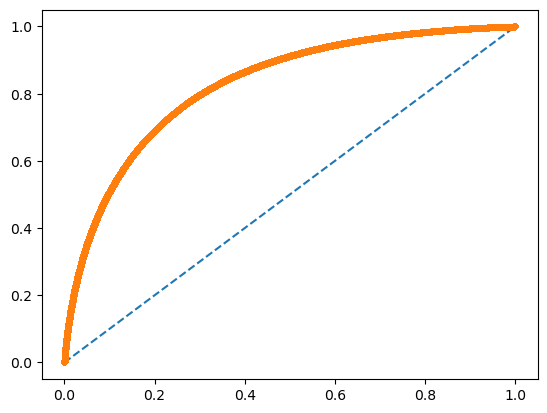

In [109]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
lda_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % lda_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.686


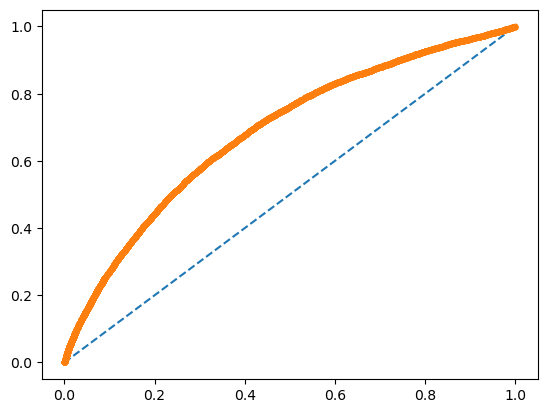

In [110]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()


In [111]:
log_metrics=classification_report(train_labels, pred_class_train,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision=round(df.loc["1"][0],2)
log_train_recall=round(df.loc["1"][1],2)
log_train_f1=round(df.loc["1"][2],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.73
log_train_recall  0.79
log_train_f1  0.76


In [112]:
log_metrics=classification_report(test_labels, pred_class_test,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision=round(df.loc["1"][0],2)
log_test_recall=round(df.loc["1"][1],2)
log_test_f1=round(df.loc["1"][2],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.08
log_test_recall  0.56
log_test_f1  0.14


In [113]:
index=['Accuracy', 'AUC', 'Recall']
data = pd.DataFrame({
       'Log reg Train':[log_train_acc,auc,logis_train_recall], 
       'LDA':[lda_train_acc,lda_train_auc,log_train_recall], 
},index=index)
round(data,2)

,Log reg Train,LDA
Accuracy,0.75,0.75
AUC,0.83,0.83
Recall,0.77,0.79


In [114]:
index=['Accuracy', 'AUC', 'Recall']
data = pd.DataFrame({
       'Log reg Train':[log_test_acc,test_auc,logis_test_recall],  
        'LDA':[lda_test_acc,log_test_auc,log_test_recall], 

},index=index)
round(data,2)

,Log reg Train,LDA
Accuracy,0.72,0.71
AUC,0.68,0.69
Recall,0.54,0.56


3. Decision Tree

In [115]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [116]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)
ytrain_predict_prob=reg_dt_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.565082,0.434918
1,0.332484,0.667516
2,0.800509,0.199491
3,0.800509,0.199491
4,0.988148,0.011852


In [117]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
site_id               0.000000
listing_country_id    0.000000
listing_stars         0.000000
listing_review_score  0.145564
is_brand              0.000196
location_score1       0.001333
location_score2       0.101619
log_historical_price  0.040211
listing_position      0.441264
price_usd             0.000271
has_promotion         0.000000
destination_id        0.000052
length_of_stay        0.201037
booking_window        0.000000
num_adults            0.000000
num_kids              0.000000
num_rooms             0.000000
stay_on_saturday      0.002813
distance_to_dest      0.000059
random_sort           0.065581


In [118]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81    509183
           1       0.83      0.78      0.80    509183

    accuracy                           0.81   1018366
   macro avg       0.81      0.81      0.81   1018366
weighted avg       0.81      0.81      0.81   1018366



In [120]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90    218176
           1       0.09      0.34      0.14      9879

    accuracy                           0.81    228055
   macro avg       0.53      0.59      0.52    228055
weighted avg       0.93      0.81      0.86    228055



In [121]:
confusion_matrix(train_labels, ytrain_predict)

array([[426499,  82684],
       [111485, 397698]], dtype=int64)

In [122]:
confusion_matrix(test_labels, ytest_predict)

array([[182389,  35787],
       [  6490,   3389]], dtype=int64)

In [123]:
DT_Train = reg_dt_model.score(X_train,train_labels)
DT_Train

0.8093327939071021

In [124]:
DT_Test = reg_dt_model.score(X_test,test_labels)
DT_Test

0.8146192804367367

AUC: 0.826


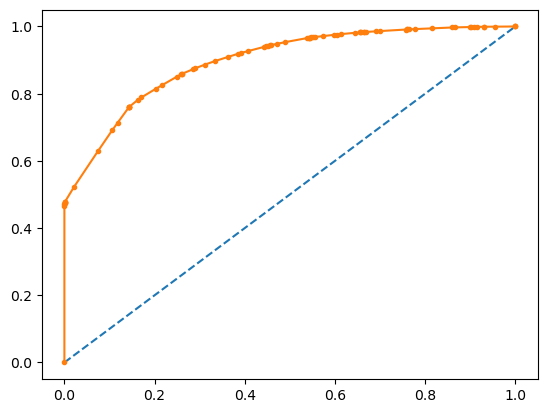

In [125]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
DT_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.826


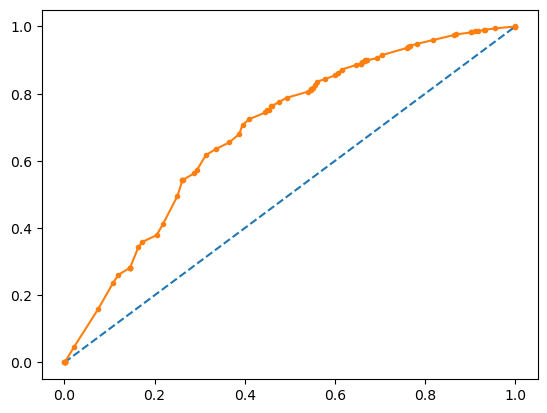

In [126]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
DT_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [127]:
DT_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(DT_metrics).transpose()
DT_train_precision=round(df.loc["1"][0],2)
DT_train_recall=round(df.loc["1"][1],2)
DT_train_f1=round(df.loc["1"][2],2)
print ('DT_train_precision ',DT_train_precision)
print ('DT_train_recall ',DT_train_recall)
print ('DT_train_f1 ',DT_train_f1)

DT_train_precision  0.83
DT_train_recall  0.78
DT_train_f1  0.8


In [128]:
log_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
DT_test_precision=round(df.loc["1"][0],2)
DT_test_recall=round(df.loc["1"][1],2)
DT_test_f1=round(df.loc["1"][2],2)
print ('DT_test_precision ',DT_test_precision)
print ('DT_test_recall ',DT_test_recall)
print ('DT_test_f1 ',DT_test_f1)

DT_test_precision  0.09
DT_test_recall  0.34
DT_test_f1  0.14


In [129]:
index=['Accuracy', 'AUC', 'Recall']
data = pd.DataFrame({
       'Log Regression':[log_train_acc,auc,logis_train_recall], 
       'LDA':[lda_train_acc,lda_train_auc,log_train_recall], 
       'Decision Tree':[DT_Train,DT_train_auc,DT_train_recall], 

},index=index)
round(data,2)

,Log Regression,LDA,Decision Tree
Accuracy,0.75,0.75,0.81
AUC,0.83,0.83,0.90
Recall,0.77,0.79,0.78


In [130]:
index=['Accuracy', 'AUC', 'Recall']
data = pd.DataFrame({
       'Log Regression ':[log_test_acc,test_auc,logis_test_recall],  
        'LDA':[lda_test_acc,log_test_auc,log_test_recall], 
      'Decision Tree':[DT_Test,DT_test_auc,DT_test_recall], 
},index=index)
round(data,2)

,Log Regression,LDA,Decision Tree
Accuracy,0.72,0.71,0.81
AUC,0.68,0.69,0.69
Recall,0.54,0.56,0.34
